In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, 

In [2]:
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
labels = train.pop('label')

In [5]:
labels = to_categorical(labels)

In [6]:
train = train.values

In [7]:
train = np.array([np.reshape(i, (28,28)) for i in train])

In [8]:
train = train/255

In [9]:
train.shape

(42000, 28, 28)

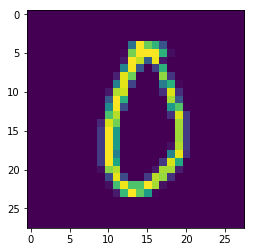

In [10]:
plt.imshow(train[69])

In [13]:
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.0, random_state = 41)

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_val = X_val.reshape(X_val.shape[0], 28,28,1)

In [15]:
y_train.shape

(42000, 10)

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(8, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(156, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(104, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 156)               62556     
_________________________________________________________________
dropout_1 (Dropout)          (None, 156)               0         
__________

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=512)

Train on 42000 samples, validate on 0 samples
Epoch 1/50
42000/42000 [==============================] - 15s 364us/step - loss: 0.9053 - acc: 0.7159
Epoch 2/50
42000/42000 [==============================] - 13s 308us/step - loss: 0.2577 - acc: 0.9211
Epoch 3/50
42000/42000 [==============================] - 14s 326us/step - loss: 0.1666 - acc: 0.9486
Epoch 4/50
42000/42000 [==============================] - 15s 364us/step - loss: 0.1268 - acc: 0.9615
Epoch 5/50
42000/42000 [==============================] - 13s 307us/step - loss: 0.1015 - acc: 0.9691
Epoch 6/50
42000/42000 [==============================] - 13s 306us/step - loss: 0.0893 - acc: 0.9726
Epoch 7/50
42000/42000 [==============================] - 13s 303us/step - loss: 0.0879 - acc: 0.9730
Epoch 8/50
42000/42000 [==============================] - 13s 306us/step - loss: 0.0704 - acc: 0.9792
Epoch 9/50
42000/42000 [==============================] - 13s 307us/step - loss: 0.0637 - acc: 0.9800
Epoch 10/50
42000/42000 [===========

KeyError: 'val_acc'

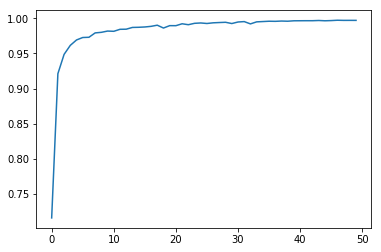

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [22]:
test.shape

(28000, 784)

In [24]:
X_test = test.values

In [25]:
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

In [26]:
X_test = X_test/255

In [27]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
X_test.shape

(28000, 28, 28, 1)

In [29]:
predictions = model.predict(X_test)

In [30]:
predictions[0]

array([2.3607015e-12, 6.2647737e-10, 1.0000000e+00, 2.7764951e-10,
       2.9056015e-12, 5.7459793e-16, 3.9522130e-14, 1.1817436e-10,
       3.6401962e-12, 2.0292562e-13], dtype=float32)

In [31]:
ans = np.argmax(predictions, axis=1)

In [35]:
plt.imshow(test[0])

KeyError: 0

In [36]:
answer = pd.read_csv('data/sample_submission.csv')

In [38]:
answer['Label'] = ans

In [39]:
answer.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
